In [19]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Training on 2015 to 2020

In [20]:
df = pd.read_csv('clean_co.csv')
df.head()

,Month,CO_Con,CO_AQI
0,Jan 2015,0.745897,8.507987
1,Feb 2015,0.565448,6.441962
2,Mar 2015,0.470486,5.356844
3,Apr 2015,0.361735,4.054030
4,May 2015,0.284872,3.129109


In [21]:
# PURPOSE: uses datetime to turn into dates

dat = np.repeat(20, 72, axis=0).astype(str)  + df["Month"].astype(str) 
dat = pd.to_datetime(dat)
end = dat + pd.offsets.MonthBegin(1) - datetime.timedelta(days = 1)
df["Month"] = end
df.head()

,Month,CO_Con,CO_AQI
0,2015-01-31,0.745897,8.507987
1,2015-02-28,0.565448,6.441962
2,2015-03-31,0.470486,5.356844
3,2015-04-30,0.361735,4.054030
4,2015-05-31,0.284872,3.129109


In [22]:
df['New Month'] = df['Month'].apply(lambda x: x.toordinal())
df.head()

,Month,CO_Con,CO_AQI,New Month
0,2015-01-31,0.745897,8.507987,735629
1,2015-02-28,0.565448,6.441962,735657
2,2015-03-31,0.470486,5.356844,735688
3,2015-04-30,0.361735,4.054030,735718
4,2015-05-31,0.284872,3.129109,735749


In [23]:
days = []
conc = []
df_dates = df.loc[:,'New Month']
df_conc = df.loc[:, 'CO_Con']

for day in df_dates:
    days.append([int(day)])
    
for con in df_conc:
    conc.append(float(con))

In [24]:
# train_test_split
np.random.seed(1000)
X_train, X_test, y_train, y_test = train_test_split(days, conc, test_size=0.3)
    
svr = SVR(kernel = 'rbf') # uses default values for parameters C and gamma
svr.fit(X_train, y_train)
svr.predict(days)

array([0.64590775, 0.6358895 , 0.62403202, 0.61188977, 0.59876933,
       0.58563663, 0.5717475 , 0.55767251, 0.54400809, 0.52998103,
       0.51662585, 0.50318286, 0.49022907, 0.47865895, 0.46697899,
       0.45644152, 0.44642515, 0.43764071, 0.42955591, 0.42251924,
       0.41673098, 0.41181497, 0.4080843 , 0.40527242, 0.40348944,
       0.40272667, 0.40276921, 0.40363704, 0.40531319, 0.40760905,
       0.41058532, 0.41407394, 0.41783518, 0.42200863, 0.42621513,
       0.43061835, 0.43496032, 0.43873146, 0.4426357 , 0.44604652,
       0.44909838, 0.45151799, 0.45340303, 0.45461768, 0.45513311,
       0.45498555, 0.45421124, 0.45281357, 0.45089263, 0.44880112,
       0.44621803, 0.44359755, 0.44094111, 0.43860315, 0.43662896,
       0.43531224, 0.43486011, 0.4354358 , 0.437172  , 0.44033939,
       0.44503084, 0.45088367, 0.4587582 , 0.46798352, 0.47914539,
       0.49145389, 0.50561395, 0.52108005, 0.53710411, 0.55452962,
       0.57199268, 0.59038833])

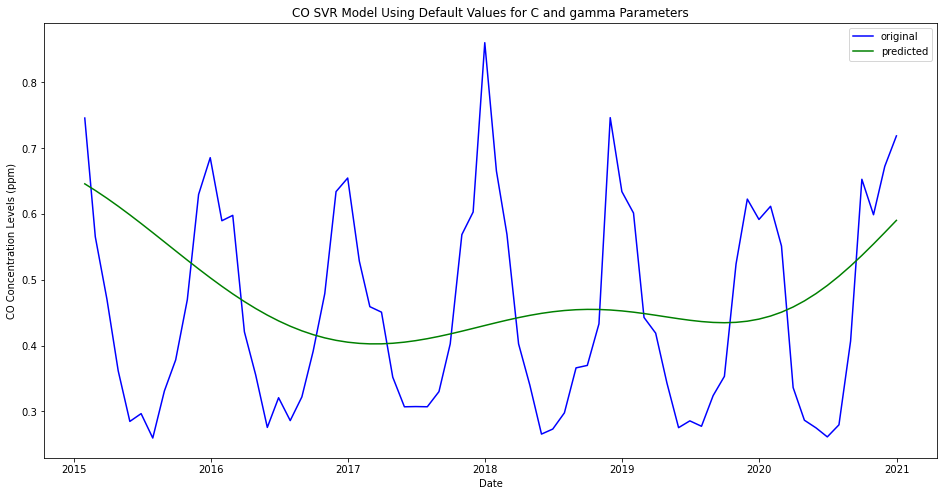

In [25]:
fig = plt.figure(figsize = (16,8))
plt.plot(df.loc[:,'Month'], conc, color = 'blue', label = 'original')
plt.plot(df.loc[:,'Month'], svr.predict(days), color = 'green', label = 'predicted')
plt.xlabel('Date')
plt.ylabel('CO Concentration Levels (ppm)')
plt.title('CO SVR Model Using Default Values for C and gamma Parameters')
plt.legend()

In [26]:
# percent error:
pred = sum(svr.predict(days))
act = sum(conc)
print(pred)
print(act)
print('The percent error for this is:', float((abs(act-(pred))/act)*100), '%.')

# coefficient of determination R^2 of the prediction:
print('The coefficient of determination R^2 is', svr.score(X_train, y_train), '.')

33.89349709484691
32.36353869130054
The percent error for this is: 4.727413828691194 %.
The coefficient of determination R^2 is 0.11129583802069243 .


##### Since the coefficient of determination R^2 is not very close to 1, we can use the grid search method to find the best C and gamma values for this model.

### Grid Search:

In [27]:
parameters = {'C' : [1, 10, 1000, 10000],'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'auto', 'scale']},
model = SVR(kernel = 'rbf')
grids = GridSearchCV(model, parameters, cv = 5)
print(grids.fit(X_train,y_train))
print("The best parameters are: ", grids.best_params_)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=({'C': [1, 10, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'auto',
                                    'scale']},))
The best parameters are:  {'C': 1, 'gamma': 0.0001}


In [28]:
best_svm = SVR(kernel = 'rbf', C = 1, gamma = 0.0001)
best_svm.fit(X_train,y_train)

SVR(C=1, gamma=0.0001)

In [29]:
# percent error:
pred = sum(svr.predict(days))
act = sum(conc)
print(pred)
print(act)
print('The percent error for this is:', float((abs(act-(pred))/act)*100), '%.')

print('The root mean square error (RMSE) of the SVR Model is:', np.sqrt(metrics.mean_squared_error(y_test, best_svm.predict(X_test))), '.')
print('The coefficient of determination R^2 of the SVR Model is: ', best_svm.score(X_train,y_train), '.')

33.89349709484691
32.36353869130054
The percent error for this is: 4.727413828691194 %.
The root mean square error (RMSE) of the SVR Model is: 0.10876359532045674 .
The coefficient of determination R^2 of the SVR Model is:  0.7453949537465715 .


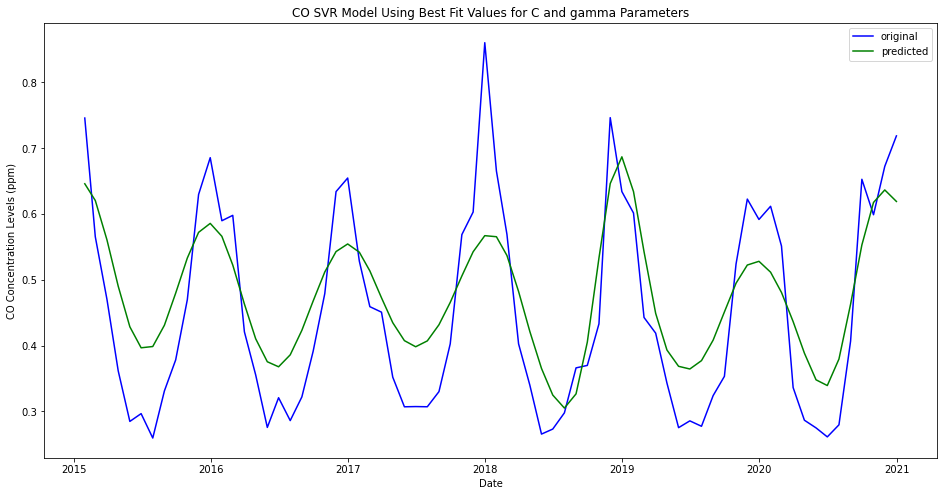

In [30]:
plt.figure(figsize=(16,8))
plt.plot(df['Month'], conc, color = "blue", label = 'original')
plt.plot(df['Month'], best_svm.predict(days), color = 'green', label = 'predicted')
plt.xlabel('Date')
plt.ylabel('CO Concentration Levels (ppm)')
plt.title('CO SVR Model Using Best Fit Values for C and gamma Parameters')
plt.legend()

# Training on 2015 to 2019; Predicting 2020

In [31]:
dates_thru_2019 = days[0:60] # use this to train on 2015-2019 only
conc_thru_2019 = conc[0:60] # use this to train on 2015-2019 only
dates_2020 = days[-12:] # use this to predict 2020 -- in .predict

In [32]:
np.random.seed(1000)
X_train, X_test, y_train, y_test = train_test_split(dates_thru_2019, conc_thru_2019, test_size=0.3) # train on 2015-2019
    
svr = SVR(kernel = 'rbf') # use default values for parameters C and gamma
svr.fit(X_train, y_train)

SVR()

In [33]:
svr.predict(dates_2020) # predict 2020

array([0.51108636, 0.52890127, 0.54743268, 0.56446407, 0.58074841,
       0.59491844, 0.60764992, 0.61823645, 0.62631634, 0.63237462,
       0.63603593, 0.63762479])

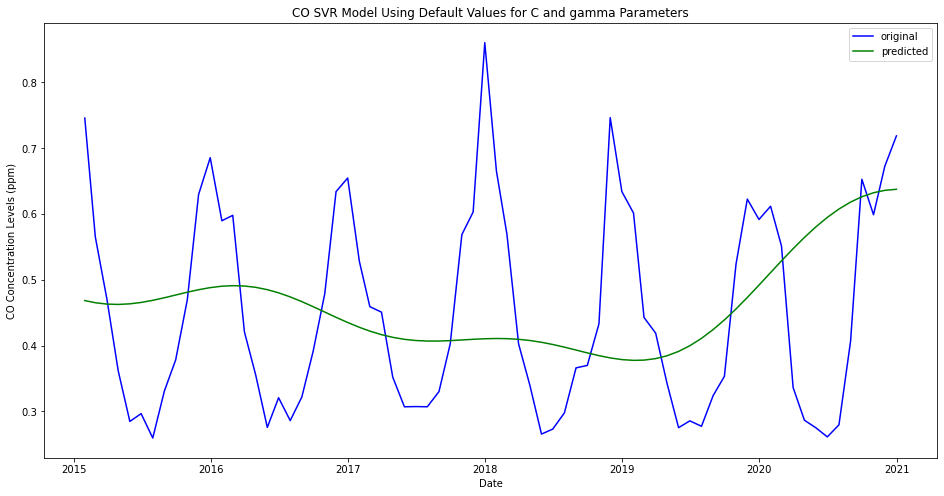

In [34]:
plt.figure(figsize=(16,8))
plt.plot(df['Month'], conc, color = "blue", label = 'original')
plt.plot(df['Month'], svr.predict(days), color = 'green', label = 'predicted')
plt.xlabel('Date')
plt.ylabel('CO Concentration Levels (ppm)')
plt.title('CO SVR Model Using Default Values for C and gamma Parameters')
plt.legend()

In [35]:
# percent error:
pred = sum(svr.predict(dates_2020))
act = sum(conc[-12:])
print(pred)
print(act)
print('The percent error for this is:', float((abs(act-(pred))/act)*100), '%.')

# coefficient of determination R^2 of the prediction:
print('The coefficient of determination R^2 is', svr.score(X_train, y_train), '.')

7.085789297021895
5.652430579309001
The percent error for this is: 25.358271943396783 %.
The coefficient of determination R^2 is 0.04887967563956552 .


##### Since the coefficient of determination R^2 is not very close to 1, we can use the grid search method to find the best C and gamma values for this model.

#### Grid Search

In [36]:
parameters = {'C' : [1, 10, 1000, 10000],'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'auto', 'scale']},
model = SVR(kernel = 'rbf')
grids = GridSearchCV(model, parameters, cv = 5)
print(grids.fit(X_train,y_train))
print("The best parameters are: ", grids.best_params_)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=({'C': [1, 10, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'auto',
                                    'scale']},))
The best parameters are:  {'C': 1, 'gamma': 0.0001}


In [37]:
best_svm = SVR(kernel = 'rbf', C = 1, gamma = 0.0001) # use best fit values for C and gamma
best_svm.fit(X_train,y_train)

print(best_svm.predict(dates_2020)) # predict 2020

# percent error:
pred = sum(svr.predict(dates_2020))
act = sum(conc[-12:])
print('The percent error for this is:', float((abs(act-(pred))/act)*100), '%.')

print('The root mean square error (RMSE) of the SVR Model is:', np.sqrt(metrics.mean_squared_error(y_test, best_svm.predict(X_test))), '.')
print('The coefficient of determination R^2 of the SVR Model is: ', best_svm.score(X_train,y_train), '.')

[0.49339136 0.49018979 0.48500666 0.4806713  0.47783846 0.47648385
 0.47592787 0.47575244 0.47570814 0.47569824 0.47569655 0.4756963 ]
The percent error for this is: 25.358271943396783 %.
The root mean square error (RMSE) of the SVR Model is: 0.11913065767604744 .
The coefficient of determination R^2 of the SVR Model is:  0.6909117971344811 .


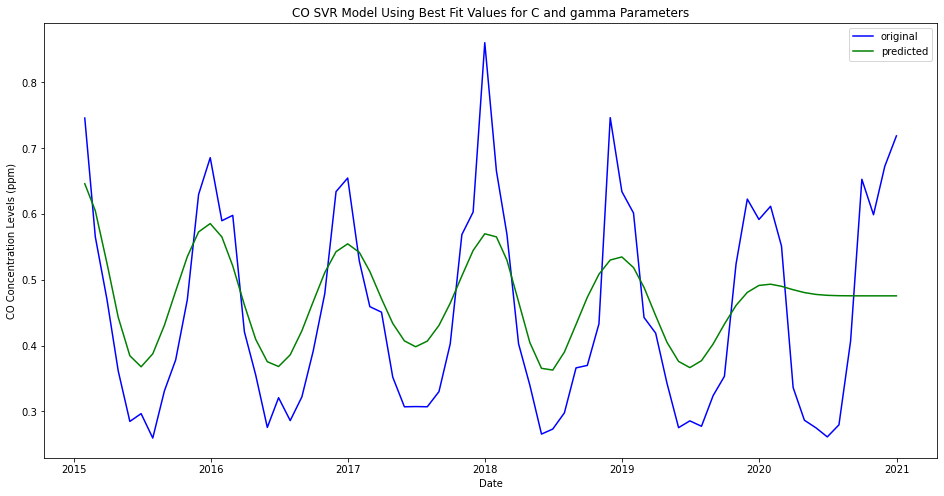

In [38]:
plt.figure(figsize=(16,8))
plt.plot(df['Month'], conc, color = "blue", label = 'original')
plt.plot(df['Month'], best_svm.predict(days), color = 'green', label = 'predicted')
plt.xlabel('Date')
plt.ylabel('CO Concentration Levels (ppm)')
plt.title('CO SVR Model Using Best Fit Values for C and gamma Parameters')
plt.legend()